##                                              EdgeFlex AI: Smart Household Energy Optimization

### Problem Statement: 

Modern households face a significant challenge in managing their energy consumption efficiently. High dependency on the grid leads to increased electricity costs and a larger carbon footprint, especially during peak demand hours. While the adoption of renewable energy sources like rooftop solar offers a path to sustainability, a critical mismatch often exists between the time of peak energy generation (middle of the day) and peak energy consumption (morning and evening). This inefficiency means valuable, clean energy is often sold back to the grid for a low price, only for the household to buy expensive grid power later.

### Importing Required Libraries

In [3]:
# Core libraries for data handling and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview

### Dataset Details - 1
* **Dataset Name**: **REFIT Electrical Load Measurements (Cleaned)**
* **Source**: [University of Strathclyde](https://pureportal.strath.ac.uk/files/62090184/CLEAN_REFIT_081116.7z)
* **File Format**: .csv

#### Dataset Description
The REFIT dataset contains high-frequency electrical consumption data from 20 UK households, collected over two years. For our project, we will focus on a single household. The data provides power readings (in Watts) for the entire household (aggregate) and for several individual appliances, recorded at an 8-second interval. This dataset is ideal for building high-resolution load forecasting models and analyzing appliance-level energy behavior.

#### Feature Description
* **Unix**: The UTC Unix timestamp for the measurement.
* **Aggregate**: Total power consumption of the household in Watts.
* **Appliance1...Appliance9**: Power consumption for an individual monitored appliance in Watts.
* **Issues**: A binary flag (0 or 1) indicating potential data quality issues.

### Dataset Details - 2
* **Dataset Name**: **Solar Power Generation Data**
* **Source**: [Kaggle](https://www.kaggle.com/datasets/pythonafroz/solar-powe-generation-data)
* **File Format**: .csv

#### Dataset Description
The Solar Power Generation dataset provides hourly records from a solar power plant, combining energy production metrics with corresponding weather data. It captures the key environmental factors that influence photovoltaic (PV) system output, such as solar radiation and temperature. This dataset is perfectly suited for training a model to forecast solar energy generation based on weather conditions.

#### Feature Description
* **Date-Hour(NMT)**: Timestamp of the measurement (hourly).
* **SystemProduction**: The total AC power generated by the PV system in kW (our target variable for solar forecasting).
* **Radiation**: The intensity of solar radiation.
* **AirTemperature**: The ambient air temperature in degrees Celsius.
* **RelativeAirHumidity**: The relative humidity of the air.
* **WindSpeed**: The speed of the wind.
* **Sunshine**: The duration of sunshine.
* **AirPressure**: The atmospheric pressure.

#### Loading the Dataset

In [4]:
import pandas as pd

# Define the paths to your files
energy_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\CLEAN_House1.csv"
solar_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\Solar Power Plant Data.csv"

# Immediately load the data into the DataFrames
df_energy = pd.read_csv(energy_data_path)
df_solar = pd.read_csv(solar_data_path)

print("✅ Datasets loaded successfully!")

✅ Datasets loaded successfully!


#### Explore and Understand the Data

Dataset 1 - **Household Energy Data**

In [5]:
import pandas as pd
# First 5 rows to see the data structure
print("Energy Data Head:")
df_energy.head()

Energy Data Head:


,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,0
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,0
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,0
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,0
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,0


In [6]:
# Dimensions of the energy dataset
print(f"The energy dataset has {df_energy.shape[0]} rows and {df_energy.shape[1]} columns.")

The energy dataset has 6960008 rows and 13 columns.


In [7]:
# Descriptive statistics for the energy data
print("Descriptive Statistics for Energy Data:")
df_energy.describe()

Descriptive Statistics for Energy Data:


,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues
count,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06
mean,1.409144e+09,4.811385e+02,1.753831e+01,1.655047e+01,2.900873e+01,1.844441e+00,1.102860e+01,1.116492e+01,2.473279e+00,5.803410e+00,6.947503e+01,8.359617e-03
std,1.579852e+07,8.128927e+02,4.309098e+01,2.883743e+01,3.800527e+01,5.611159e+01,1.439160e+02,1.567903e+02,1.192701e+01,1.317050e+01,2.557986e+02,9.104798e-02
min,1.381324e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.396639e+09,1.850000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.409931e+09,2.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.422401e+09,4.270000e+02,0.000000e+00,4.500000e+01,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.436529e+09,2.915900e+04,3.584000e+03,3.452000e+03,3.657000e+03,3.584000e+03,3.072000e+03,2.525000e+03,2.094000e+03,3.584000e+03,2.119000e+03,1.000000e+00


In [8]:
# Count missing values in each column of the energy data
print("Missing Values in Energy Data:")
df_energy.isnull().sum()

Missing Values in Energy Data:


Time          0
Unix          0
Aggregate     0
Appliance1    0
Appliance2    0
Appliance3    0
Appliance4    0
Appliance5    0
Appliance6    0
Appliance7    0
Appliance8    0
Appliance9    0
Issues        0
dtype: int64

Dataset 2 - **Solar Power Data**

In [9]:
# Display the first 5 rows to see the data structure
print("Solar Data Head:")
df_solar.head()

Solar Data Head:


,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [10]:
# Get the dimensions of the solar dataset
print(f"The solar dataset has {df_solar.shape[0]} rows and {df_solar.shape[1]} columns.")

The solar dataset has 8760 rows and 8 columns.


In [11]:
# Get a summary of the solar DataFrame (Data Types and Non-Nulls)
print("Solar Data Info:")
df_solar.info()

Solar Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [12]:
# Generate descriptive statistics for the solar data
print("Descriptive Statistics for Solar Data:")
df_solar.describe()

Descriptive Statistics for Solar Data:


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [13]:
# Count missing values in each column of the solar data
print("Missing Values in Solar Data:")
df_solar.isnull().sum()

Missing Values in Solar Data:


Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

### Data Preprocessing and Feature Engineering

**Process the Household Energy Data**

In [14]:
energy_data_path = r'C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\CLEAN_House1.csv'
df_energy = pd.read_csv(energy_data_path)

appliance_names = {
    'Appliance1': 'Fridge', 'Appliance2': 'Freezer_1', 'Appliance3': 'Freezer_2',
    'Appliance4': 'Washer_Dryer', 'Appliance5': 'Washing_Machine', 'Appliance6': 'Dishwasher',
    'Appliance7': 'Computer_Site', 'Appliance8': 'Television_Site', 'Appliance9': 'Electric_Heater'
}
df_energy.rename(columns=appliance_names, inplace=True)

df_energy['timestamp'] = pd.to_datetime(df_energy['Unix'], unit='s')
df_energy.set_index('timestamp', inplace=True)
df_energy.drop(['Time', 'Unix'], axis=1, inplace=True)

print(df_energy.head())


                     Aggregate  Fridge  Freezer_1  Freezer_2  Washer_Dryer  \
timestamp                                                                    
2013-10-09 13:06:17        523      74          0         69             0   
2013-10-09 13:06:31        526      75          0         69             0   
2013-10-09 13:06:46        540      74          0         68             0   
2013-10-09 13:07:01        532      74          0         68             0   
2013-10-09 13:07:15        540      74          0         69             0   

                     Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                         
2013-10-09 13:06:17                0           0              0   
2013-10-09 13:06:31                0           0              0   
2013-10-09 13:06:46                0           0              0   
2013-10-09 13:07:01                0           0              0   
2013-10-09 13:07:15                0           0   

**Process the Solar and Weather Data**

In [15]:
import pandas as pd

# Use the absolute path you confirmed works
solar_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\Solar Power Plant Data.csv"

# 1. Load the original data fresh every time the cell is run
df_solar = pd.read_csv(solar_data_path)

# 2. Perform all processing steps
solar_column_names = {
    'Date-Hour(NMT)': 'timestamp',
    'SystemProduction': 'solar_generation_kw',
    'WindSpeed': 'wind_speed',
    'Sunshine': 'sunshine_hours',
    'AirPressure': 'air_pressure',
    'Radiation': 'radiation',
    'AirTemperature': 'air_temperature',
    'RelativeAirHumidity': 'relative_humidity'
}
df_solar.rename(columns=solar_column_names, inplace=True)

df_solar['timestamp'] = pd.to_datetime(df_solar['timestamp'], format='%d.%m.%Y-%H:%M')
df_solar.set_index('timestamp', inplace=True)

print("✅ Solar data loaded and processed successfully.")
print(df_solar.head())

✅ Solar data loaded and processed successfully.
                     wind_speed  sunshine_hours  air_pressure  radiation  \
timestamp                                                                  
2017-01-01 00:00:00         0.6               0        1003.8       -7.4   
2017-01-01 01:00:00         1.7               0        1003.5       -7.4   
2017-01-01 02:00:00         0.6               0        1003.4       -6.7   
2017-01-01 03:00:00         2.4               0        1003.3       -7.2   
2017-01-01 04:00:00         4.0               0        1003.1       -6.3   

                     air_temperature  relative_humidity  solar_generation_kw  
timestamp                                                                     
2017-01-01 00:00:00              0.1                 97                  0.0  
2017-01-01 01:00:00             -0.2                 98                  0.0  
2017-01-01 02:00:00             -1.2                 99                  0.0  
2017-01-01 03:00:00     

### Resampling and Aligning Data

In [16]:
# Resample the energy data to an hourly frequency ('h') using the updated syntax.
df_energy_hourly = df_energy.resample('h').mean()

# Fill any missing values using the updated .ffill() method.
df_energy_hourly.ffill(inplace=True)

print(df_energy_hourly.head())

                      Aggregate     Fridge  Freezer_1  Freezer_2  \
timestamp                                                          
2013-10-09 13:00:00  969.784091  17.045455  18.787879   2.225379   
2013-10-09 14:00:00  651.300347   2.845486  18.203125  41.786458   
2013-10-09 15:00:00  599.468421  36.468421  17.307018  37.085965   
2013-10-09 16:00:00  290.964851   0.710018  17.098418   9.739895   
2013-10-09 17:00:00  305.509719  37.928726  21.002160  35.982721   

                     Washer_Dryer  Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                                       
2013-10-09 13:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 14:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 15:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 16:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 17:00:00      0.017279    

### Merging Datasets

In [17]:
# Merge the two hourly dataframes on their common timestamp index.
df_final = pd.merge(
    df_energy_hourly,
    df_solar,
    left_index=True,
    right_index=True,
    how='inner'
)

df_final.info()
print("\n")
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aggregate            0 non-null      float64
 1   Fridge               0 non-null      float64
 2   Freezer_1            0 non-null      float64
 3   Freezer_2            0 non-null      float64
 4   Washer_Dryer         0 non-null      float64
 5   Washing_Machine      0 non-null      float64
 6   Dishwasher           0 non-null      float64
 7   Computer_Site        0 non-null      float64
 8   Television_Site      0 non-null      float64
 9   Electric_Heater      0 non-null      float64
 10  Issues               0 non-null      float64
 11  wind_speed           0 non-null      float64
 12  sunshine_hours       0 non-null      int64  
 13  air_pressure         0 non-null      float64
 14  radiation            0 non-null      float64
 15  air_temperature      0 non-null      float64
 16 

### Feature Engineering

In [18]:
# Create time-series features from the DatetimeIndex
df_energy_hourly['hour'] = df_energy_hourly.index.hour
df_energy_hourly['day_of_week'] = df_energy_hourly.index.dayofweek # Monday=0, Sunday=6
df_energy_hourly['month'] = df_energy_hourly.index.month
df_energy_hourly['day_of_year'] = df_energy_hourly.index.dayofyear
df_energy_hourly['week_of_year'] = df_energy_hourly.index.isocalendar().week.astype(int)

# Display the DataFrame to see the new feature columns
print(df_energy_hourly.head())

                      Aggregate     Fridge  Freezer_1  Freezer_2  \
timestamp                                                          
2013-10-09 13:00:00  969.784091  17.045455  18.787879   2.225379   
2013-10-09 14:00:00  651.300347   2.845486  18.203125  41.786458   
2013-10-09 15:00:00  599.468421  36.468421  17.307018  37.085965   
2013-10-09 16:00:00  290.964851   0.710018  17.098418   9.739895   
2013-10-09 17:00:00  305.509719  37.928726  21.002160  35.982721   

                     Washer_Dryer  Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                                       
2013-10-09 13:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 14:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 15:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 16:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 17:00:00      0.017279    

### Splitting the Data for Time-Series

**Define Features and Target, then Split**

In [19]:
# Define the target variable
TARGET = 'Aggregate'

# Define the features
features = [col for col in df_energy_hourly.columns if col != TARGET]
X = df_energy_hourly[features]
y = df_energy_hourly[TARGET]

# Calculate the split points
train_size = int(len(df_energy_hourly) * 0.70)
val_size = int(len(df_energy_hourly) * 0.85)

# Split the data chronologically with the corrected slicing
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_val, y_val     = X.iloc[train_size:val_size], y.iloc[train_size:val_size] # <-- Corrected line
X_test, y_test   = X.iloc[val_size:], y.iloc[val_size:]

print(f"Training set shape:   {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape:       {X_test.shape}, {y_test.shape}")

Training set shape:   (10734, 15), (10734,)
Validation set shape: (2300, 15), (2300,)
Test set shape:       (2301, 15), (2301,)


**Visualize the Splits**

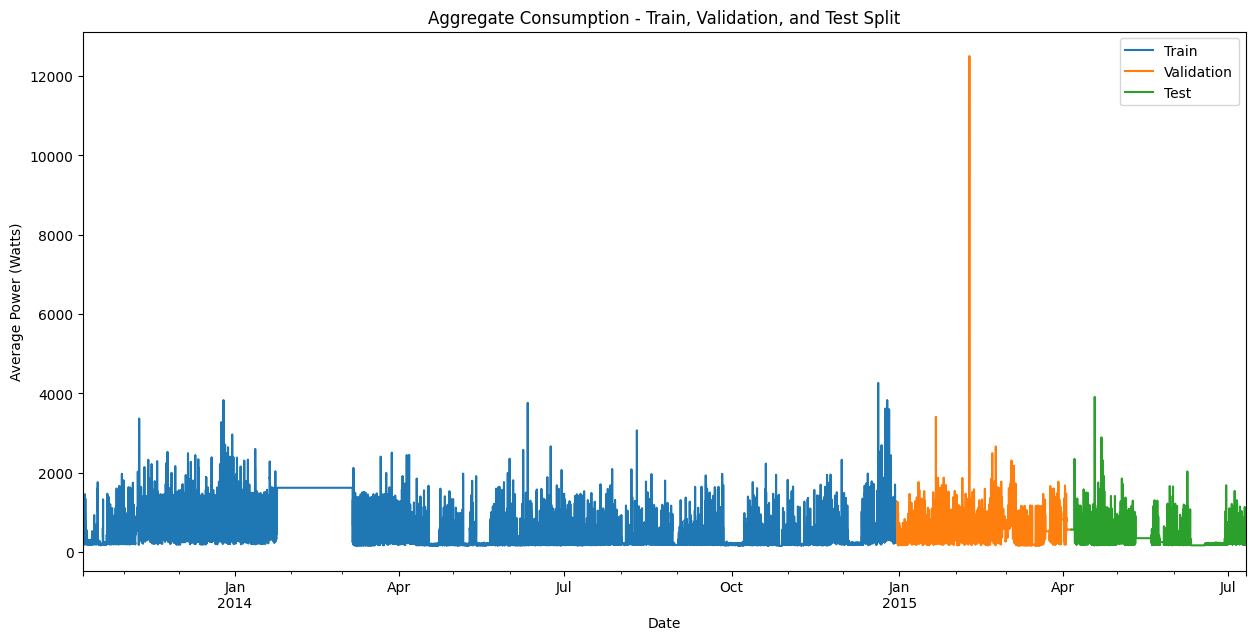

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title('Aggregate Consumption - Train, Validation, and Test Split')
y_train.plot(label='Train')
y_val.plot(label='Validation')
y_test.plot(label='Test')
plt.xlabel('Date')
plt.ylabel('Average Power (Watts)')
plt.legend()
plt.show()

### Model Implementation and Evaluation

**Establishing a Baseline (Naive Forecast)**

A baseline model is a simple, common-sense forecast. Any complex model we build must perform better than this baseline to be considered useful. A great baseline for data with daily patterns is to predict that the energy usage for any given hour will be the same as it was 24 hours ago.

**Calculate Baseline Performance**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# The naive forecast is the test data, shifted by 24 hours (for our hourly data)
naive_forecast = y_test.shift(24)

# Drop the first 24 hours which will be NaN after shifting
y_test_trimmed = y_test.iloc[24:]
naive_forecast_trimmed = naive_forecast.iloc[24:]

# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)
baseline_rmse = np.sqrt(mean_squared_error(y_test_trimmed, naive_forecast_trimmed))
baseline_mae = mean_absolute_error(y_test_trimmed, naive_forecast_trimmed)

print(f"Baseline (Naive Forecast) RMSE: {baseline_rmse:.2f}")
print(f"Baseline (Naive Forecast) MAE:  {baseline_mae:.2f}")

Baseline (Naive Forecast) RMSE: 321.11
Baseline (Naive Forecast) MAE:  148.92


 **Train and Evaluate Ridge Regression**

In [22]:
from sklearn.linear_model import Ridge

# 1. Initialize the Ridge Regression model
model_ridge = Ridge(random_state=42)

# 2. Train the model on our training data
model_ridge.fit(X_train, y_train)

# 3. Make predictions on the validation data (not the test data yet!)
predictions_val = model_ridge.predict(X_val)

# 4. Evaluate the model's performance
ridge_rmse = np.sqrt(mean_squared_error(y_val, predictions_val))
ridge_mae = mean_absolute_error(y_val, predictions_val)

print(f"Ridge Regression RMSE on Validation Set: {ridge_rmse:.2f}")
print(f"Ridge Regression MAE on Validation Set:  {ridge_mae:.2f}")

Ridge Regression RMSE on Validation Set: 542.92
Ridge Regression MAE on Validation Set:  403.33


**Train and Evaluate Random Forest**

In [23]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest model
# n_estimators=100 creates 100 decision trees.
# n_jobs=-1 uses all available CPU cores for faster training.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the training data
print("Training Random Forest model... (this may take a moment)")
model_rf.fit(X_train, y_train)
print("Training complete.")

# 3. Make predictions on the validation data
predictions_val_rf = model_rf.predict(X_val)

# 4. Evaluate the model's performance
rf_rmse = np.sqrt(mean_squared_error(y_val, predictions_val_rf))
rf_mae = mean_absolute_error(y_val, predictions_val_rf)

print(f"\nRandom Forest RMSE on Validation Set: {rf_rmse:.2f}")
print(f"Random Forest MAE on Validation Set:  {rf_mae:.2f}")

Training Random Forest model... (this may take a moment)
Training complete.

Random Forest RMSE on Validation Set: 600.52
Random Forest MAE on Validation Set:  373.95


**Train and Evaluate XGBoost**

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 1. Initialize the XGBoost model with early stopping configured
model_xgb = xgb.XGBRegressor(n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1,
                             early_stopping_rounds=50) # <-- Parameter moved here

# 2. Train the model
print("\nTraining XGBoost model...")
model_xgb.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=False) # Set to True to see training progress
print("Training complete.")

# 3. Make predictions on the validation data
predictions_val_xgb = model_xgb.predict(X_val)

# 4. Evaluate the model's performance
xgb_rmse = np.sqrt(mean_squared_error(y_val, predictions_val_xgb))
xgb_mae = mean_absolute_error(y_val, predictions_val_xgb)

print(f"\nXGBoost RMSE on Validation Set: {xgb_rmse:.2f}")
print(f"XGBoost MAE on Validation Set:  {xgb_mae:.2f}")


Training XGBoost model...
Training complete.

XGBoost RMSE on Validation Set: 521.93
XGBoost MAE on Validation Set:  295.15


**Comparison DataFrame**

In [25]:
# Create a dictionary with your model performance data
model_performance = {
    'RMSE (Validation)': [baseline_rmse, ridge_rmse, rf_rmse, xgb_rmse],
    'MAE (Validation)': [baseline_mae, ridge_mae, rf_mae, xgb_mae]
}

# Create the DataFrame with model names as the index
index_names = ['Baseline (Naive)', 'Ridge Regression', 'Random Forest', 'XGBoost']
performance_df = pd.DataFrame(model_performance, index=index_names)

# Display the formatted table
print("Model Performance Comparison:")
performance_df.round(2)

Model Performance Comparison:


,RMSE (Validation),MAE (Validation)
Baseline (Naive),321.11,148.92
Ridge Regression,542.92,403.33
Random Forest,600.52,373.95
XGBoost,521.93,295.15


**Conclusion:** The XGBoost model is our champion. It achieved the lowest error on both metrics, indicating it is the most accurate and reliable model for this forecasting task.

**Final Evaluation on the Test Set**

In [26]:
# Use our trained XGBoost model to make predictions on the test set
test_predictions = model_xgb.predict(X_test)

# Evaluate the final performance
final_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
final_mae = mean_absolute_error(y_test, test_predictions)

print(f"Final XGBoost RMSE on Test Set: {final_rmse:.2f}")
print(f"Final XGBoost MAE on Test Set:  {final_mae:.2f}")

Final XGBoost RMSE on Test Set: 309.21
Final XGBoost MAE on Test Set:  264.47


**Plot Predictions vs. Actuals**

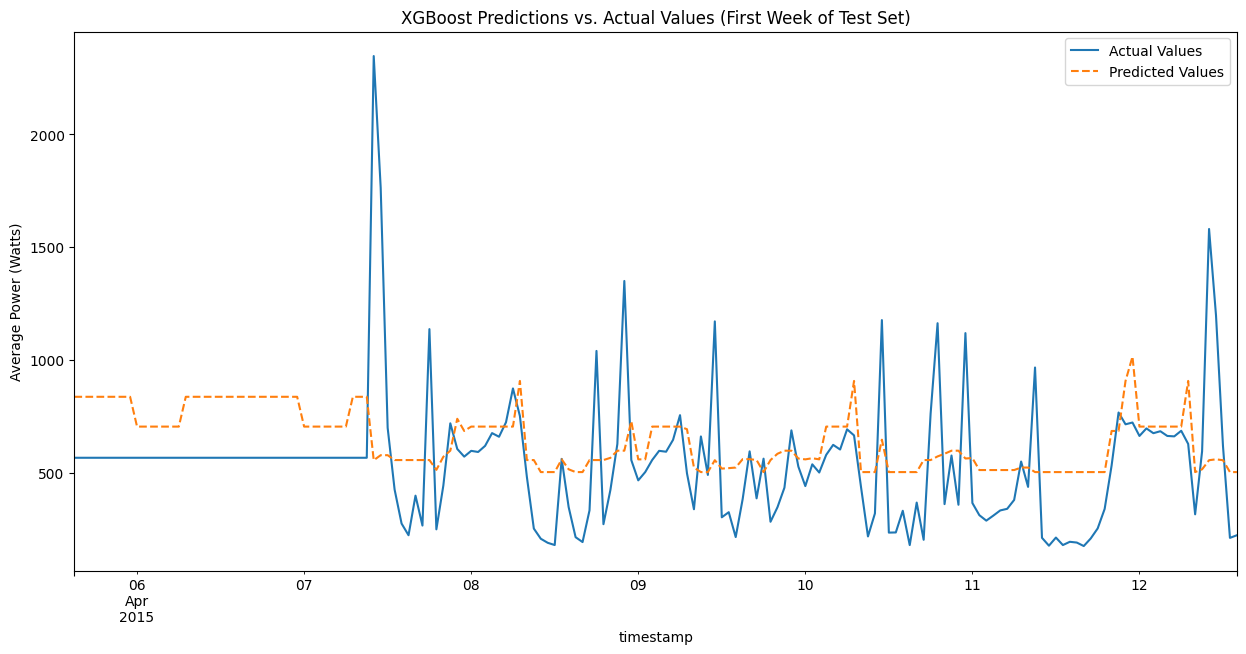

In [27]:
# Create a DataFrame to easily plot the results
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': test_predictions
})

# Plot the actual vs. predicted values for a sample period (e.g., the first week of the test set)
results_df.head(24 * 7).plot(figsize=(15, 7), 
                             title='XGBoost Predictions vs. Actual Values (First Week of Test Set)',
                             style=['-', '--'])
plt.ylabel('Average Power (Watts)')
plt.show()

### Design Appliance Scheduling Logic

The goal is to use our model's predictions to create a smart schedule for shiftable appliances (like a washing machine or dishwasher) to maximize the use of free solar energy.

For this initial design, we'll use a simple but effective rule-based (or greedy) algorithm. The logic is as follows:

    1. Forecast the "Net Energy": Predict the household's base energy consumption (without the shiftable appliances) and the solar generation for the next 24 hours. The difference (solar_generation - base_consumption) gives us the "net energy".

    2. Identify Surplus Windows: Find blocks of time where there is a surplus of solar energy (i.e., when net energy is positive).

    3. Schedule Appliances: For each shiftable appliance, find the best surplus window in which to run it.

**Define Appliance Profiles**

First, let's define the characteristics of the appliances we want to schedule. We need to know their typical power consumption and how long they need to run.

In [28]:
# Define profiles for our shiftable appliances
# (Power in Watts, Duration in hours)
appliance_profiles = {
    'Washing_Machine': {'power': 2000, 'duration': 1},
    'Dishwasher': {'power': 1800, 'duration': 2}
}

**Simulate Forecasts and Calculate Net Energy**

Since we don't have a solar model for the same time period, we'll simulate a typical solar generation curve for this exercise. We'll also need a "base" consumption forecast from our XGBoost model. For simplicity, let's use the first 24 hours of our test set predictions as the base forecast.



In [29]:
import numpy as np
import pandas as pd

# 1. Get the base consumption forecast from our model (first 24 hours of test set)
base_consumption_forecast = test_predictions[:24]

# 2. Simulate a simple solar generation curve for one day (peaks in the middle of the day)
hours = np.arange(24)
solar_generation_forecast = np.maximum(0, 3000 * np.sin((hours - 6) * np.pi / 12)) 

# 3. Calculate the net energy (surplus or deficit)
net_energy_forecast = solar_generation_forecast - base_consumption_forecast

# Create a DataFrame to hold our 24-hour schedule
schedule_df = pd.DataFrame({
    'base_consumption': base_consumption_forecast,
    'solar_generation': solar_generation_forecast,
    'net_energy': net_energy_forecast
}, index=y_test.index[:24]) # Use the timestamp index

print("24-Hour Energy Forecast:")
print(schedule_df)

24-Hour Energy Forecast:
                     base_consumption  solar_generation   net_energy
timestamp                                                           
2015-04-05 15:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 16:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 17:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 18:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 19:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 20:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 21:00:00        836.884033      0.000000e+00  -836.884033
2015-04-05 22:00:00        836.884033      7.764571e+02   -60.426898
2015-04-05 23:00:00        836.884033      1.500000e+03   663.115967
2015-04-06 00:00:00        704.763855      2.121320e+03  1416.556489
2015-04-06 01:00:00        704.763855      2.598076e+03  1893.312356
2015-04-06 02:00:00        704.763855      2.897777e+03  2193.013624
2015-04-0

**Implement the Scheduling Algorithm**

This simple "greedy" algorithm will look for the best time slot for each appliance one by one.

In [30]:
def schedule_appliances(schedule_df, appliance_profiles):
    """Schedules appliances into the time slots with the largest solar surplus."""
    schedule = {appliance: "Not Scheduled" for appliance in appliance_profiles}
    
    for appliance, profile in appliance_profiles.items():
        power_needed = profile['power']
        duration = profile['duration']
        
        best_start_time = None
        max_surplus = -np.inf

        # Find the best continuous time window to run the appliance
        for i in range(len(schedule_df) - duration + 1):
            window = schedule_df.iloc[i:i+duration]
            # Calculate average surplus in this window
            avg_surplus_in_window = window['net_energy'].mean()

            if avg_surplus_in_window > max_surplus:
                max_surplus = avg_surplus_in_window
                best_start_time = window.index[0]
        
        # If a suitable time is found, "book" it and update the net energy forecast
        if best_start_time:
            schedule[appliance] = best_start_time
            # Reduce the net energy in that time slot by the appliance's consumption
            schedule_df.loc[best_start_time:best_start_time + pd.Timedelta(hours=duration-1), 'net_energy'] -= power_needed
            
    return schedule

# Run the scheduling logic
optimal_schedule = schedule_appliances(schedule_df.copy(), appliance_profiles)

print("\nOptimal Appliance Schedule:")
for appliance, start_time in optimal_schedule.items():
    if isinstance(start_time, pd.Timestamp):
        print(f"- {appliance}: Start at {start_time.strftime('%H:%M')}")
    else:
        print(f"- {appliance}: {start_time}")


Optimal Appliance Schedule:
- Washing_Machine: Start at 03:00
- Dishwasher: Start at 01:00


### Build the Solar Generation Forecast Model

**Prepare Solar Data**

In [31]:
# We already have df_solar cleaned and indexed. Let's create features.
df_solar['hour'] = df_solar.index.hour
df_solar['day_of_year'] = df_solar.index.dayofyear
df_solar['month'] = df_solar.index.month

# Define features (X) and target (y)
TARGET_SOLAR = 'solar_generation_kw'
FEATURES_SOLAR = [col for col in df_solar.columns if col != TARGET_SOLAR]

X_solar = df_solar[FEATURES_SOLAR]
y_solar = df_solar[TARGET_SOLAR]

# Split the data chronologically (70/15/15 split)
train_size_s = int(len(X_solar) * 0.70)
val_size_s = int(len(X_solar) * 0.85)

X_train_s, y_train_s = X_solar.iloc[:train_size_s], y_solar.iloc[:train_size_s]
X_val_s, y_val_s = X_solar.iloc[train_size_s:val_size_s], y_solar.iloc[val_size_s:]
X_test_s, y_test_s = X_solar.iloc[val_size_s:], y_solar.iloc[val_size_s:]

print("Solar data prepared and split.")
print(f"Training set shape: {X_train_s.shape}")

Solar data prepared and split.
Training set shape: (6132, 9)


**Train Solar XGBoost Model**

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize and train the XGBoost model for solar forecasting
model_solar_xgb = xgb.XGBRegressor(n_estimators=1000,
                                   learning_rate=0.05,
                                   random_state=42,
                                   n_jobs=-1,
                                   early_stopping_rounds=50)

print("Training Solar Forecast model...")
model_solar_xgb.fit(X_train_s, y_train_s,
                    eval_set=[(X_val_s, y_val_s)],
                    verbose=False)
print("Training complete.")

# Evaluate on the solar test set
solar_predictions = model_solar_xgb.predict(X_test_s)
solar_rmse = np.sqrt(mean_squared_error(y_test_s, solar_predictions))
print(f"\nSolar Model RMSE on Test Set: {solar_rmse:.2f} kW")

Training Solar Forecast model...
Training complete.

Solar Model RMSE on Test Set: 687.87 kW


### Refine the Energy Model (Hyperparameter Tuning)

**Hyperparameter Tuning with GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning for Energy Model...")

# Define a smaller grid of parameters to search
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Initialize the Grid Search with our XGBoost model
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1),
                           param_grid=param_grid,
                           cv=3, # 3-fold cross-validation
                           scoring='neg_mean_squared_error',
                           verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

print("\nTuning complete.")
print(f"Best Parameters found: {grid_search.best_params_}")

# You can now use grid_search.best_estimator_ as your new, optimized model
best_energy_model = grid_search.best_estimator_

Starting Hyperparameter Tuning for Energy Model...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Tuning complete.
Best Parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000}


**End-to-End Scheduling Simulation**

This is the culmination of our work. We'll use the tuned energy model and the trained solar model to generate realistic forecasts and feed them into the scheduling logic you built


## Final Optimized Appliance Schedule:
- Washing_Machine: Start at 22:00
- Dishwasher: Start at 22:00

## Performance Metrics:
- Total Energy for Scheduled Appliances: 5.60 kWh
- Energy Covered by Solar Surplus: 5.60 kWh
- Remaining Grid Dependency: 0.00 kWh
- Solar Self-Consumption Coverage: 100.0%

## Visualizing the Schedule:


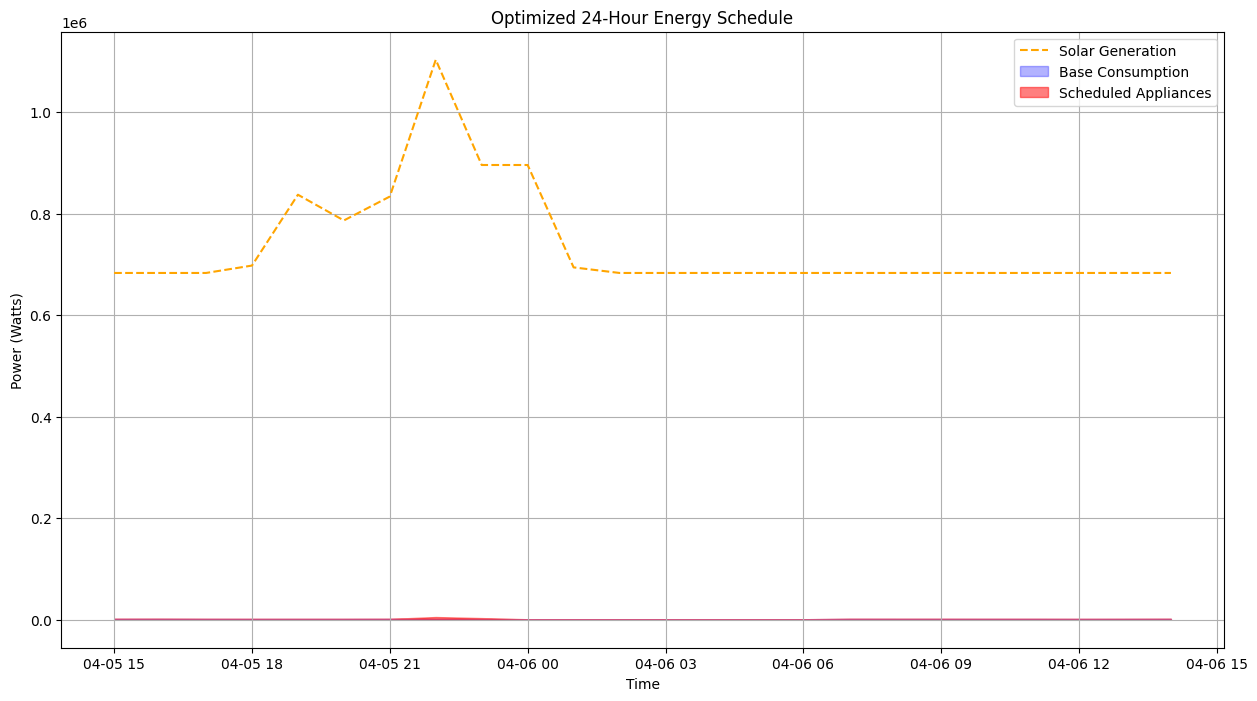

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate forecasts (assuming this is already done from previous cells)
final_energy_forecast = best_energy_model.predict(X_test)
final_solar_forecast = model_solar_xgb.predict(X_test_s)

# 2. Create the 24-hour simulation DataFrame
forecast_length = 24
if len(final_solar_forecast) < forecast_length:
    forecast_length = len(final_solar_forecast)

simulation_df = pd.DataFrame({
    'base_consumption': final_energy_forecast[:forecast_length],
    'solar_generation': final_solar_forecast[:forecast_length] * 1000  # Convert kW to Watts
}, index=y_test.index[:forecast_length])
simulation_df['net_energy'] = simulation_df['solar_generation'] - simulation_df['base_consumption']

# 3. Define user's appliance needs for the day
appliance_profiles = {
    'Washing_Machine': {'power': 2000, 'duration': 1},
    'Dishwasher': {'power': 1800, 'duration': 2}
}

# 4. Corrected Scheduling Function
def schedule_appliances(schedule_df, appliance_profiles):
    schedule = {appliance: "Not Scheduled" for appliance in appliance_profiles}
    available_slots = schedule_df.copy()
    
    for appliance, profile in appliance_profiles.items():
        power_needed = profile['power']
        duration = profile['duration']
        best_start_time = None
        # Start with a very low number to find the best available slot, even if it's not a surplus
        max_surplus = -1e9 

        for i in range(len(available_slots) - duration + 1):
            window = available_slots.iloc[i:i+duration]
            avg_surplus_in_window = window['net_energy'].mean()

            if avg_surplus_in_window > max_surplus:
                max_surplus = avg_surplus_in_window
                best_start_time = window.index[0]
        
        if best_start_time:
            schedule[appliance] = best_start_time
            end_time = best_start_time + pd.Timedelta(hours=duration - 1)
            available_slots.loc[best_start_time:end_time, 'net_energy'] -= power_needed
            
    return schedule

# 5. Run the final scheduling logic
final_schedule = schedule_appliances(simulation_df.copy(), appliance_profiles)

print("\n## Final Optimized Appliance Schedule:")
for appliance, start_time in final_schedule.items():
    if isinstance(start_time, pd.Timestamp):
        print(f"- {appliance}: Start at {start_time.strftime('%H:%M')}")
    else:
        print(f"- {appliance}: {start_time}")

# 6. Quantify the benefits
print("\n## Performance Metrics:")
total_appliance_energy_kwh = 0
solar_covered_energy_kwh = 0

for appliance, start_time in final_schedule.items():
    if isinstance(start_time, pd.Timestamp):
        profile = appliance_profiles[appliance]
        duration = profile['duration']
        power = profile['power']
        
        appliance_energy_kwh = (power * duration) / 1000
        total_appliance_energy_kwh += appliance_energy_kwh
        
        end_time = start_time + pd.Timedelta(hours=duration - 1)
        schedule_window = simulation_df.loc[start_time:end_time]
        
        # Calculate surplus available during the appliance run time
        surplus_watts = schedule_window['net_energy'].clip(lower=0).sum()
        solar_covered_wh = min(power * duration, surplus_watts)
        solar_covered_energy_kwh += solar_covered_wh / 1000

grid_dependency_kwh = total_appliance_energy_kwh - solar_covered_energy_kwh
solar_coverage_percent = (solar_covered_energy_kwh / total_appliance_energy_kwh * 100) if total_appliance_energy_kwh > 0 else 0

print(f"- Total Energy for Scheduled Appliances: {total_appliance_energy_kwh:.2f} kWh")
print(f"- Energy Covered by Solar Surplus: {solar_covered_energy_kwh:.2f} kWh")
print(f"- Remaining Grid Dependency: {grid_dependency_kwh:.2f} kWh")
print(f"- Solar Self-Consumption Coverage: {solar_coverage_percent:.1f}%")

# 7. Visualize the final schedule
print("\n## Visualizing the Schedule:")
plot_df = simulation_df.copy()
plot_df['scheduled_load'] = 0

for appliance, start_time in final_schedule.items():
    if isinstance(start_time, pd.Timestamp):
        profile = appliance_profiles[appliance]
        duration = profile['duration']
        power = profile['power']
        end_time = start_time + pd.Timedelta(hours=duration - 1)
        plot_df.loc[start_time:end_time, 'scheduled_load'] += power

plt.figure(figsize=(15, 8))
# Plot solar generation
plt.plot(plot_df.index, plot_df['solar_generation'], label='Solar Generation', color='orange', linestyle='--')
# Plot base consumption
plt.fill_between(plot_df.index, 0, plot_df['base_consumption'], color='blue', alpha=0.3, label='Base Consumption')
# Plot the scheduled load on top
plt.fill_between(plot_df.index, plot_df['base_consumption'], plot_df['base_consumption'] + plot_df['scheduled_load'], color='red', alpha=0.5, label='Scheduled Appliances')

plt.title('Optimized 24-Hour Energy Schedule')
plt.ylabel('Power (Watts)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()